# 05 - EDA y Modelado: Clasificación de Delito/Arma Dominante

## Descripción del Dataset
Dataset agregado por **municipio–año–mes** que muestra qué delito y qué arma fueron dominantes.

## Objetivos de Clasificación Multiclase
1. **Predicción del delito dominante futuro**: ¿Cuál será el delito más frecuente el próximo mes?
2. **Predicción del arma dominante**: ¿Qué arma/medio será más usada?
3. **Análisis de cambios temporales**: ¿Cuáles municipios cambian su delito dominante en el tiempo?

## Utilidad Práctica
- **Priorización de recursos policiales** según el delito esperado
- **Identificación de patrones dominantes** por temporada o municipio
- **Alertas tempranas** cuando un municipio cambia su perfil delictivo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configuración
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', 50)

# Rutas
BASE_DIR = Path().resolve().parent
DATA_PATH = BASE_DIR / 'data' / 'gold' / 'model' / 'classification_dominant_dataset.parquet'

In [2]:
# Cargar datos
df = pd.read_parquet(DATA_PATH)
print(f"Shape: {df.shape}")
print(f"\nColumnas: {df.columns.tolist()}")
df.head()

Shape: (16704, 7)

Columnas: ['codigo_municipio', 'anio', 'mes', 'delito_dominante', 'count_delito', 'arma_dominante', 'count_arma']


,codigo_municipio,anio,mes,delito_dominante,count_delito,arma_dominante,count_arma
0,68001,2010,1,LESIONES,160,CONTUNDENTES,84
1,68001,2010,2,LESIONES,140,NO REPORTADO,82
2,68001,2010,3,LESIONES,164,NO REPORTADO,99
3,68001,2010,4,LESIONES,181,NO REPORTADO,111
4,68001,2010,5,LESIONES,164,NO REPORTADO,113


In [3]:
# Info general
print("=" * 60)
print("INFO GENERAL")
print("=" * 60)
df.info()
print("\n")
df.describe()

INFO GENERAL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16704 entries, 0 to 16703
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   codigo_municipio  16704 non-null  Int64   
 1   anio              16704 non-null  Int64   
 2   mes               16704 non-null  Int64   
 3   delito_dominante  16704 non-null  category
 4   count_delito      16704 non-null  int64   
 5   arma_dominante    16704 non-null  category
 6   count_arma        16704 non-null  int64   
dtypes: Int64(3), category(2), int64(2)
memory usage: 736.0 KB




,codigo_municipio,anio,mes,count_delito,count_arma
count,16704.0,16704.0,16704.0,16704.000000,16704.000000
mean,68408.735632,2017.5,6.5,9.320342,9.230364
std,242.890879,4.60991,3.452156,37.645483,37.865740
min,68001.0,2010.0,1.0,0.000000,0.000000
25%,68209.0,2013.75,3.75,1.000000,1.000000
50%,68370.0,2017.5,6.5,2.000000,2.000000
75%,68615.0,2021.25,9.25,4.000000,4.000000
max,68895.0,2025.0,12.0,1057.000000,1283.000000


---
## 2. Análisis de Variables Target (Desbalance de Clases)

Analizamos la distribución de las variables objetivo para identificar desbalance.

DISTRIBUCIÓN DE DELITO DOMINANTE

Clases únicas: 8

Distribución:
delito_dominante
LESIONES                   5916
ABIGEATO                   4200
HURTOS                     1976
AMENAZAS                   1922
VIOLENCIA INTRAFAMILIAR    1380
DELITOS SEXUALES            910
HOMICIDIOS                  331
EXTORSION                    69
Name: count, dtype: int64

Porcentajes:
delito_dominante
LESIONES                   35.42
ABIGEATO                   25.14
HURTOS                     11.83
AMENAZAS                   11.51
VIOLENCIA INTRAFAMILIAR     8.26
DELITOS SEXUALES            5.45
HOMICIDIOS                  1.98
EXTORSION                   0.41
Name: count, dtype: float64

⚠️ Ratio de desbalance (max/min): 85.74


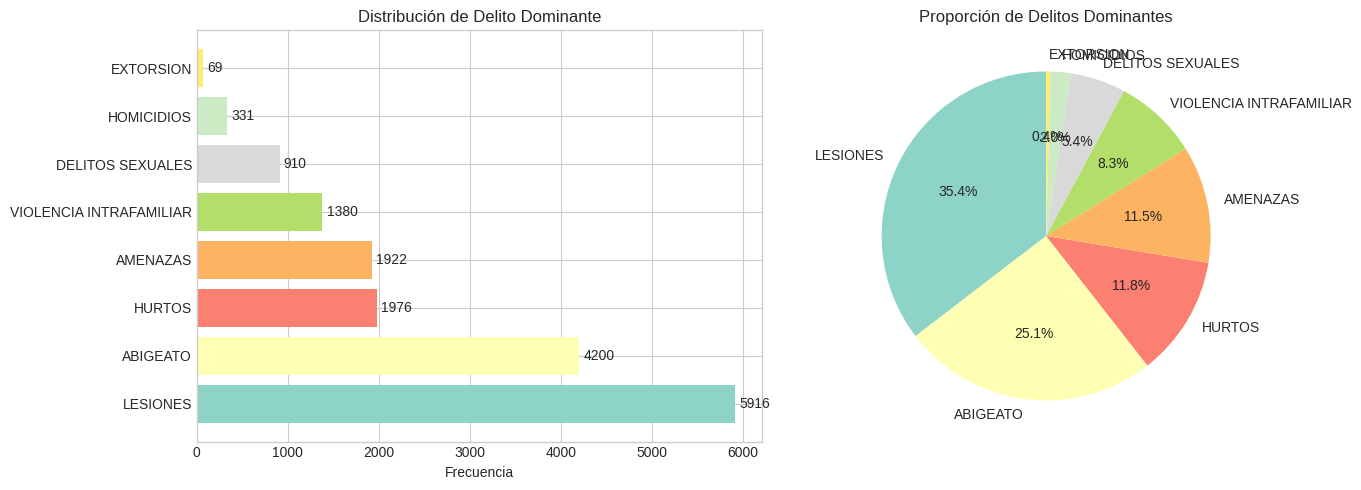

In [4]:
# 2.1 Distribución de delito_dominante
print("=" * 60)
print("DISTRIBUCIÓN DE DELITO DOMINANTE")
print("=" * 60)

delito_counts = df['delito_dominante'].value_counts()
print(f"\nClases únicas: {len(delito_counts)}")
print(f"\nDistribución:")
print(delito_counts)
print(f"\nPorcentajes:")
print((delito_counts / len(df) * 100).round(2))

# Ratio de desbalance
ratio_delito = delito_counts.max() / delito_counts.min()
print(f"\n⚠️ Ratio de desbalance (max/min): {ratio_delito:.2f}")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Barplot
ax1 = axes[0]
colors = plt.cm.Set3(np.linspace(0, 1, len(delito_counts)))
bars = ax1.barh(delito_counts.index.astype(str), delito_counts.values, color=colors)
ax1.set_xlabel('Frecuencia')
ax1.set_title('Distribución de Delito Dominante')
ax1.bar_label(bars, fmt='%d', padding=3)

# Pie chart
ax2 = axes[1]
ax2.pie(delito_counts.values, labels=delito_counts.index.astype(str), autopct='%1.1f%%', 
        colors=colors, startangle=90)
ax2.set_title('Proporción de Delitos Dominantes')

plt.tight_layout()
plt.show()

DISTRIBUCIÓN DE ARMA DOMINANTE

Clases únicas: 48

Distribución (top 15):
arma_dominante
CONTUNDENTES                   5740
ACIDO                          4094
SIN EMPLEO DE ARMAS            3521
ARMA BLANCA / CORTOPUNZANTE    1308
NO REPORTADO                   1200
ARMA DE FUEGO                   502
VEHICULO                        111
MOTO                             73
PALANCAS                         39
LLAMADA TELEFONICA               32
ESCOPOLAMINA                     14
CORTANTES                        11
DIRECTA                          11
LLAVE MAESTRA                     9
REDES SOCIALES                    5
Name: count, dtype: int64

Porcentajes (top 15):
arma_dominante
CONTUNDENTES                   34.36
ACIDO                          24.51
SIN EMPLEO DE ARMAS            21.08
ARMA BLANCA / CORTOPUNZANTE     7.83
NO REPORTADO                    7.18
ARMA DE FUEGO                   3.01
VEHICULO                        0.66
MOTO                            0.44
PALANCAS   

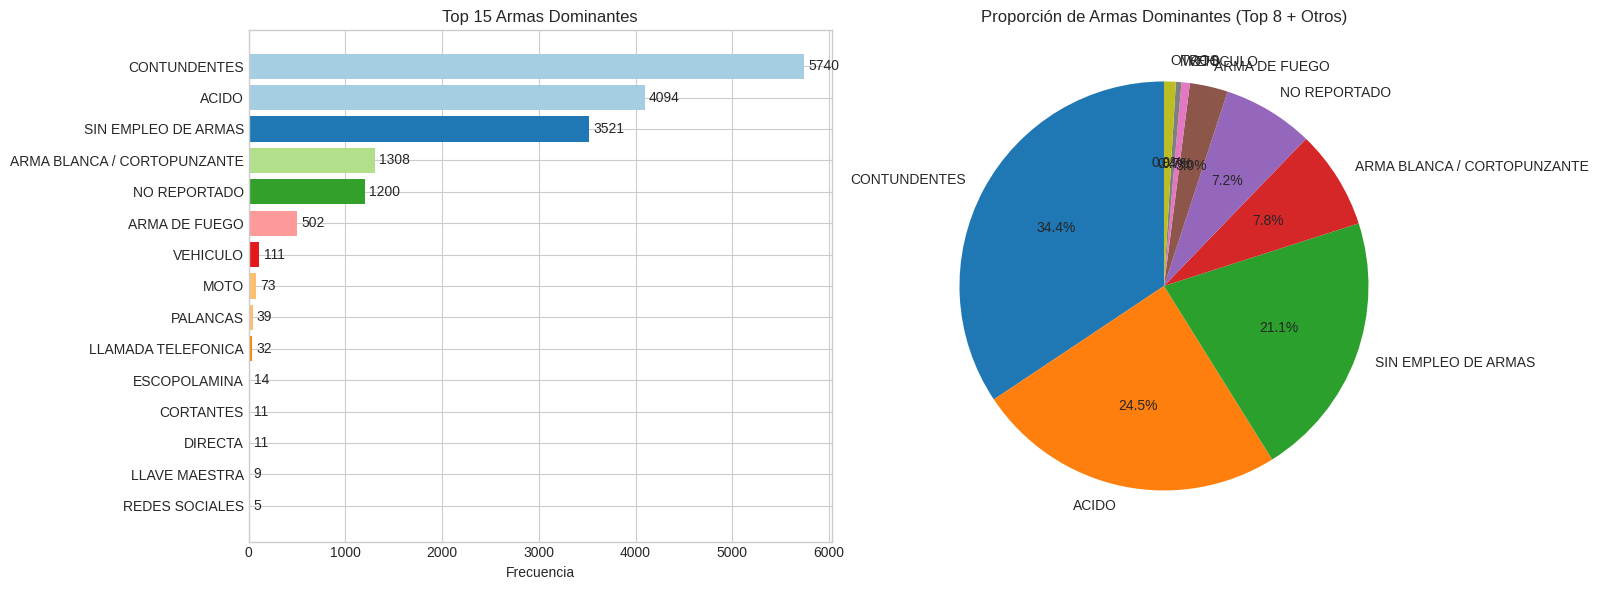

In [5]:
# 2.2 Distribución de arma_dominante
print("=" * 60)
print("DISTRIBUCIÓN DE ARMA DOMINANTE")
print("=" * 60)

arma_counts = df['arma_dominante'].value_counts()
print(f"\nClases únicas: {len(arma_counts)}")
print(f"\nDistribución (top 15):")
print(arma_counts.head(15))
print(f"\nPorcentajes (top 15):")
print((arma_counts / len(df) * 100).round(2).head(15))

# Ratio de desbalance
ratio_arma = arma_counts.max() / arma_counts[arma_counts > 0].min()
print(f"\n⚠️ Ratio de desbalance (max/min): {ratio_arma:.2f}")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 15 armas
top_armas = arma_counts.head(15)
colors = plt.cm.Paired(np.linspace(0, 1, len(top_armas)))

ax1 = axes[0]
bars = ax1.barh(top_armas.index.astype(str), top_armas.values, color=colors)
ax1.set_xlabel('Frecuencia')
ax1.set_title('Top 15 Armas Dominantes')
ax1.bar_label(bars, fmt='%d', padding=3)
ax1.invert_yaxis()

# Pie chart (top 8)
ax2 = axes[1]
top_8 = arma_counts.head(8)
otros = arma_counts.iloc[8:].sum()
pie_data = pd.concat([top_8, pd.Series({'OTROS': otros})])
ax2.pie(pie_data.values, labels=pie_data.index.astype(str), autopct='%1.1f%%', 
        startangle=90)
ax2.set_title('Proporción de Armas Dominantes (Top 8 + Otros)')

plt.tight_layout()
plt.show()

---
## 3. Análisis Temporal y por Municipio

ANÁLISIS TEMPORAL

Delito dominante por año:
delito_dominante  ABIGEATO  AMENAZAS  DELITOS SEXUALES  EXTORSION  HOMICIDIOS  \
anio                                                                            
2010                   348       105                 0          2          44   
2011                   223       113                76          0          23   
2012                   255        84                73          5          24   
2013                   271        67                61          5          20   
2014                   256       122                 0          8          18   
2015                   290       160                85          7          17   
2016                   209       136                64          5          13   
2017                   218       114               107          2          23   
2018                   208        73                 0          2           8   
2019                   200       134                88          

/tmp/ipykernel_26903/2353853025.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delito_por_anio = df.groupby(['anio', 'delito_dominante']).size().unstack(fill_value=0)
/tmp/ipykernel_26903/2353853025.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  arma_por_anio = df.groupby(['anio', 'arma_dominante']).size().unstack(fill_value=0)


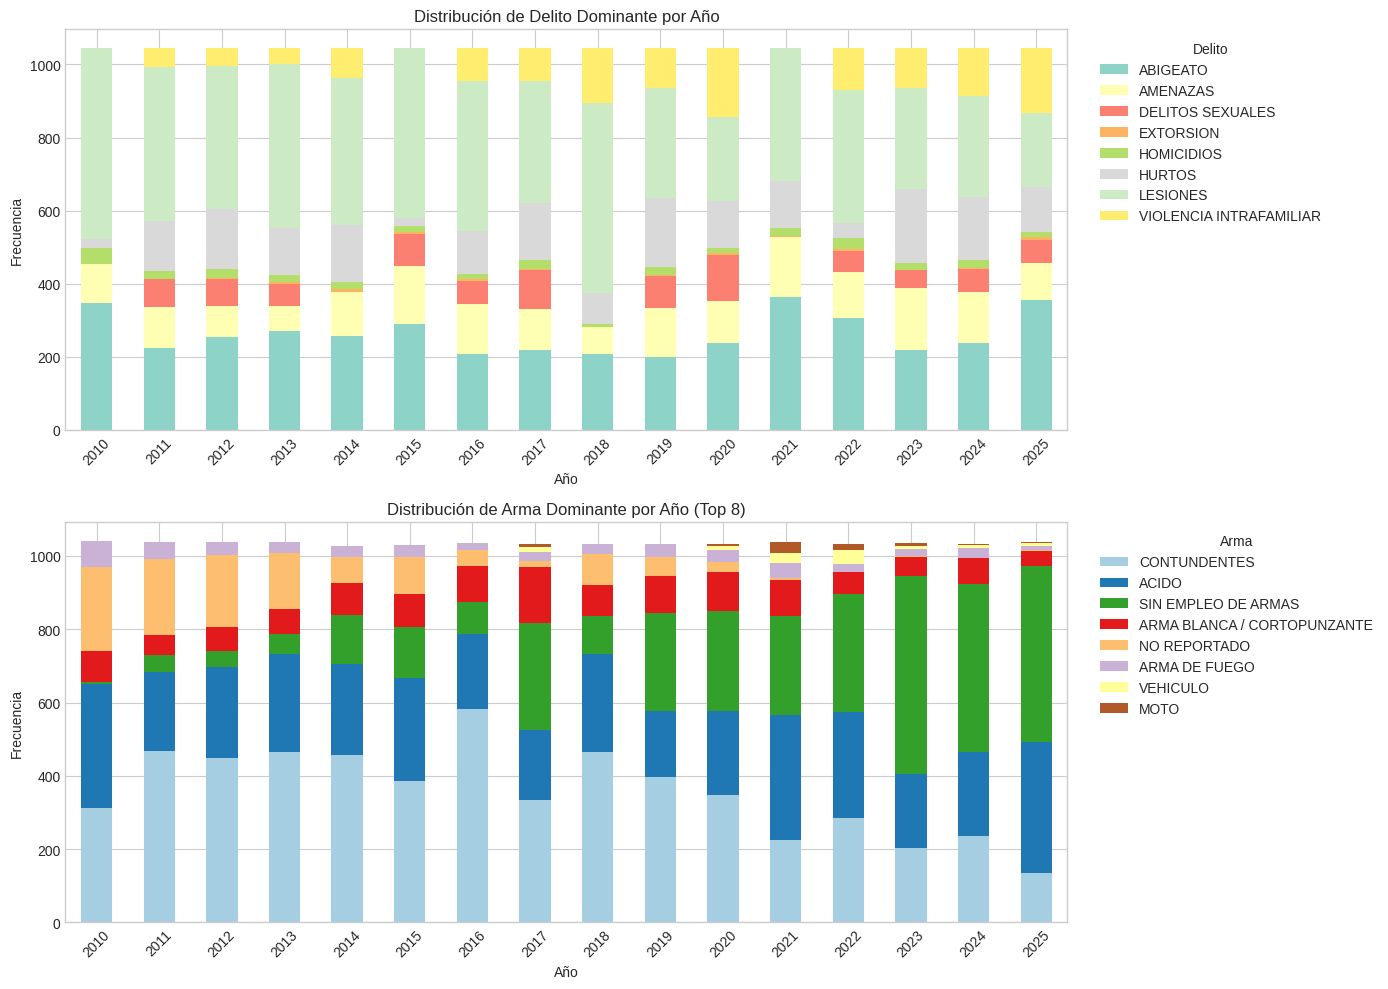

In [6]:
# 3.1 Evolución temporal del delito dominante
print("=" * 60)
print("ANÁLISIS TEMPORAL")
print("=" * 60)

# Delito dominante por año
delito_por_anio = df.groupby(['anio', 'delito_dominante']).size().unstack(fill_value=0)
print("\nDelito dominante por año:")
print(delito_por_anio)

# Visualización
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Evolución del delito dominante
ax1 = axes[0]
delito_por_anio.plot(kind='bar', stacked=True, ax=ax1, colormap='Set3')
ax1.set_title('Distribución de Delito Dominante por Año')
ax1.set_xlabel('Año')
ax1.set_ylabel('Frecuencia')
ax1.legend(title='Delito', bbox_to_anchor=(1.02, 1), loc='upper left')
ax1.tick_params(axis='x', rotation=45)

# Evolución del arma dominante
arma_por_anio = df.groupby(['anio', 'arma_dominante']).size().unstack(fill_value=0)
# Tomar solo top 8 armas para visualización
top_armas_names = df['arma_dominante'].value_counts().head(8).index.tolist()
arma_por_anio_top = arma_por_anio[top_armas_names] if all(a in arma_por_anio.columns for a in top_armas_names) else arma_por_anio.iloc[:, :8]

ax2 = axes[1]
arma_por_anio_top.plot(kind='bar', stacked=True, ax=ax2, colormap='Paired')
ax2.set_title('Distribución de Arma Dominante por Año (Top 8)')
ax2.set_xlabel('Año')
ax2.set_ylabel('Frecuencia')
ax2.legend(title='Arma', bbox_to_anchor=(1.02, 1), loc='upper left')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

MUNICIPIOS CON CAMBIOS EN DELITO DOMINANTE

Municipios con un solo delito dominante: 0
Municipios con 2+ delitos dominantes: 87
Municipios con 3+ delitos dominantes: 87

Top 10 municipios más variables:
codigo_municipio
68013    8
68020    8
68079    8
68147    8
68152    8
68121    8
68101    8
68160    8
68162    8
68179    8
Name: delito_dominante, dtype: int64


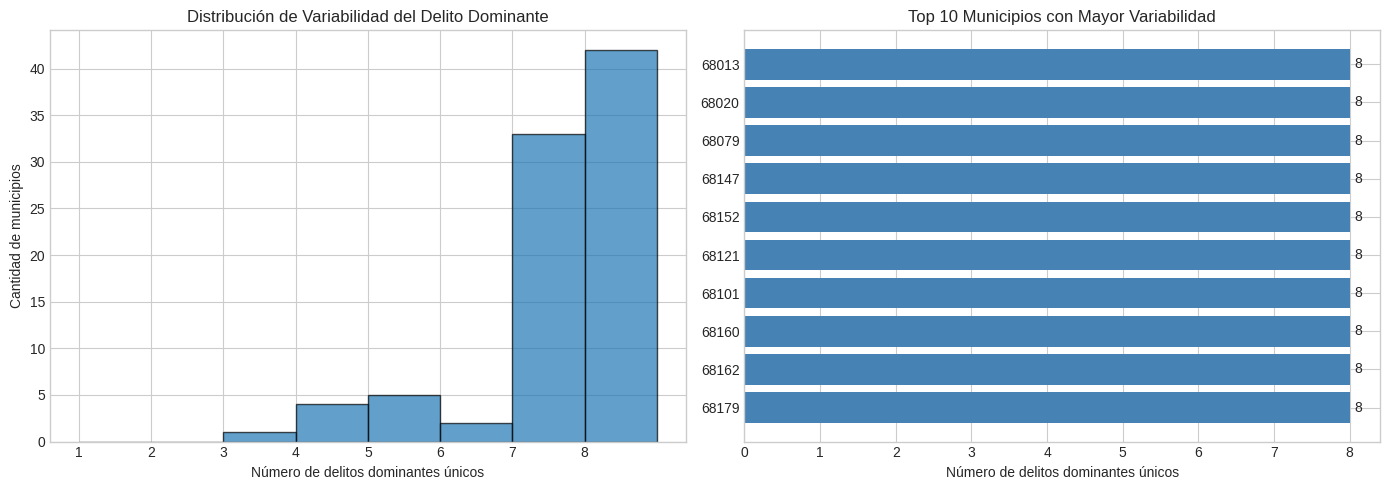

In [7]:
# 3.2 Análisis de cambios de delito dominante por municipio
print("=" * 60)
print("MUNICIPIOS CON CAMBIOS EN DELITO DOMINANTE")
print("=" * 60)

# Calcular cuántos delitos únicos tiene cada municipio
cambios_delito = df.groupby('codigo_municipio')['delito_dominante'].nunique()
print(f"\nMunicipios con un solo delito dominante: {(cambios_delito == 1).sum()}")
print(f"Municipios con 2+ delitos dominantes: {(cambios_delito > 1).sum()}")
print(f"Municipios con 3+ delitos dominantes: {(cambios_delito >= 3).sum()}")

# Municipios más variables
municipios_variables = cambios_delito.sort_values(ascending=False).head(10)
print(f"\nTop 10 municipios más variables:")
print(municipios_variables)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ax1 = axes[0]
cambios_delito.hist(bins=range(1, cambios_delito.max()+2), ax=ax1, edgecolor='black', alpha=0.7)
ax1.set_xlabel('Número de delitos dominantes únicos')
ax1.set_ylabel('Cantidad de municipios')
ax1.set_title('Distribución de Variabilidad del Delito Dominante')
ax1.set_xticks(range(1, cambios_delito.max()+1))

ax2 = axes[1]
bars = ax2.barh(municipios_variables.index.astype(str), municipios_variables.values, color='steelblue')
ax2.set_xlabel('Número de delitos dominantes únicos')
ax2.set_title('Top 10 Municipios con Mayor Variabilidad')
ax2.bar_label(bars, fmt='%d', padding=3)
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

---
## 4. Preprocesamiento y Feature Engineering

Preparamos los datos para el modelado:
- Agrupación de clases minoritarias
- Creación de features temporales (lag, estacionalidad)
- Encoding de variables categóricas

In [8]:
# 4.1 Agrupación de clases minoritarias para arma_dominante
print("=" * 60)
print("AGRUPACIÓN DE CLASES MINORITARIAS")
print("=" * 60)

# Crear copia para procesamiento
df_processed = df.copy()

# Definir umbral mínimo de muestras por clase
MIN_SAMPLES = 100

# Agrupar armas minoritarias
arma_counts = df_processed['arma_dominante'].value_counts()
armas_minoritarias = arma_counts[arma_counts < MIN_SAMPLES].index.tolist()
print(f"\nArmas con menos de {MIN_SAMPLES} muestras: {len(armas_minoritarias)}")
print(armas_minoritarias)

# Crear nueva columna con armas agrupadas
df_processed['arma_modelo'] = df_processed['arma_dominante'].apply(
    lambda x: 'OTROS' if x in armas_minoritarias else x
)

print(f"\n✅ Nueva distribución de arma_modelo:")
print(df_processed['arma_modelo'].value_counts())

# Verificar nuevo ratio de desbalance
new_arma_counts = df_processed['arma_modelo'].value_counts()
new_ratio = new_arma_counts.max() / new_arma_counts.min()
print(f"\n📊 Nuevo ratio de desbalance: {new_ratio:.2f} (antes: {ratio_arma:.2f})")

AGRUPACIÓN DE CLASES MINORITARIAS

Armas con menos de 100 muestras: 41
['MOTO', 'PALANCAS', 'LLAMADA TELEFONICA', 'ESCOPOLAMINA', 'CORTANTES', 'DIRECTA', 'LLAVE MAESTRA', 'REDES SOCIALES', 'CINTAS/CINTURON', 'PERRO', 'COMBUSTIBLE', 'BICICLETA', 'CARTA EXTORSIVA', 'AGUA CALIENTE', 'MIXTA', 'PUNZANTES', 'ARTEFACTO INCENDIARIO', 'SUSTANCIAS TOXICAS', 'ALIMENTOS VENCIDOS', 'ARMA TRAUMATICA', 'CARRO BOMBA', 'ALMOHADA', 'CORTOPUNZANTES', 'ALUCINOGENOS', 'BOLSA PLASTICA', 'ARTEFACTO EXPLOSIVO/CARGA DINAMITA', 'MINA ANTIPERSONA', 'JERINGA', 'LICOR ADULTERADO', 'GRANADA DE MANO', 'GASES', 'CUERDA/SOGA/CADENA', 'ESPOSAS', 'CUCHILLA', 'MEDICAMENTOS', 'PAPA EXPLOSIVA', 'POLVORA(FUEGOS PIROTECNICOS)', 'PRENDAS DE VESTIR', 'QUIMICOS', 'TREN', 'VENENO']

✅ Nueva distribución de arma_modelo:
arma_modelo
CONTUNDENTES                   5740
ACIDO                          4094
SIN EMPLEO DE ARMAS            3521
ARMA BLANCA / CORTOPUNZANTE    1308
NO REPORTADO                   1200
ARMA DE FUEGO        

In [9]:
# 4.2 Feature Engineering - Variables temporales y lag features
print("=" * 60)
print("FEATURE ENGINEERING")
print("=" * 60)

# Ordenar por municipio y tiempo
df_processed = df_processed.sort_values(['codigo_municipio', 'anio', 'mes']).reset_index(drop=True)

# Features cíclicas para mes (estacionalidad)
df_processed['mes_sin'] = np.sin(2 * np.pi * df_processed['mes'] / 12)
df_processed['mes_cos'] = np.cos(2 * np.pi * df_processed['mes'] / 12)

# Lag features por municipio (valores del mes anterior)
for lag in [1, 2, 3]:
    df_processed[f'count_delito_lag{lag}'] = df_processed.groupby('codigo_municipio')['count_delito'].shift(lag)
    df_processed[f'count_arma_lag{lag}'] = df_processed.groupby('codigo_municipio')['count_arma'].shift(lag)

# Media móvil (últimos 3 meses)
df_processed['count_delito_ma3'] = df_processed.groupby('codigo_municipio')['count_delito'].transform(
    lambda x: x.rolling(3, min_periods=1).mean().shift(1)
)
df_processed['count_arma_ma3'] = df_processed.groupby('codigo_municipio')['count_arma'].transform(
    lambda x: x.rolling(3, min_periods=1).mean().shift(1)
)

print(f"✅ Features creados:")
print(f"   - mes_sin, mes_cos (estacionalidad)")
print(f"   - count_delito_lag1/2/3, count_arma_lag1/2/3 (valores anteriores)")
print(f"   - count_delito_ma3, count_arma_ma3 (media móvil)")

# Eliminar filas con NaN (primeros meses de cada municipio)
rows_before = len(df_processed)
df_processed = df_processed.dropna()
rows_after = len(df_processed)
print(f"\n⚠️ Filas eliminadas por NaN en lag features: {rows_before - rows_after}")
print(f"   Dataset final: {rows_after} filas")

df_processed.head()

FEATURE ENGINEERING
✅ Features creados:
   - mes_sin, mes_cos (estacionalidad)
   - count_delito_lag1/2/3, count_arma_lag1/2/3 (valores anteriores)
   - count_delito_ma3, count_arma_ma3 (media móvil)

⚠️ Filas eliminadas por NaN en lag features: 261
   Dataset final: 16443 filas


,codigo_municipio,anio,mes,delito_dominante,count_delito,arma_dominante,count_arma,arma_modelo,mes_sin,mes_cos,count_delito_lag1,count_arma_lag1,count_delito_lag2,count_arma_lag2,count_delito_lag3,count_arma_lag3,count_delito_ma3,count_arma_ma3
3,68001,2010,4,LESIONES,181,NO REPORTADO,111,NO REPORTADO,0.866025,-0.5,164.0,99.0,140.0,82.0,160.0,84.0,154.666667,88.333333
4,68001,2010,5,LESIONES,164,NO REPORTADO,113,NO REPORTADO,0.5,-0.866025,181.0,111.0,164.0,99.0,140.0,82.0,161.666667,97.333333
5,68001,2010,6,LESIONES,157,NO REPORTADO,100,NO REPORTADO,0.0,-1.0,164.0,113.0,181.0,111.0,164.0,99.0,169.666667,107.666667
6,68001,2010,7,LESIONES,173,NO REPORTADO,108,NO REPORTADO,-0.5,-0.866025,157.0,100.0,164.0,113.0,181.0,111.0,167.333333,108.000000
7,68001,2010,8,LESIONES,196,NO REPORTADO,124,NO REPORTADO,-0.866025,-0.5,173.0,108.0,157.0,100.0,164.0,113.0,164.666667,107.000000


In [10]:
# 4.3 Preparación de features y targets
from sklearn.preprocessing import LabelEncoder

print("=" * 60)
print("PREPARACIÓN DE FEATURES Y TARGETS")
print("=" * 60)

# Definir features
feature_cols = [
    'anio', 'mes', 'codigo_municipio',
    'count_delito', 'count_arma',
    'mes_sin', 'mes_cos',
    'count_delito_lag1', 'count_delito_lag2', 'count_delito_lag3',
    'count_arma_lag1', 'count_arma_lag2', 'count_arma_lag3',
    'count_delito_ma3', 'count_arma_ma3'
]

X = df_processed[feature_cols].copy()

# Targets
y_delito = df_processed['delito_dominante'].astype(str)
y_arma = df_processed['arma_modelo'].astype(str)

# Encoders para las clases
le_delito = LabelEncoder()
le_arma = LabelEncoder()

y_delito_encoded = le_delito.fit_transform(y_delito)
y_arma_encoded = le_arma.fit_transform(y_arma)

print(f"✅ Features: {X.shape[1]} columnas")
print(f"   {feature_cols}")
print(f"\n✅ Target 1 - Delito Dominante:")
print(f"   Clases: {le_delito.classes_}")
print(f"\n✅ Target 2 - Arma Dominante (agrupada):")
print(f"   Clases: {le_arma.classes_}")

PREPARACIÓN DE FEATURES Y TARGETS
✅ Features: 15 columnas
   ['anio', 'mes', 'codigo_municipio', 'count_delito', 'count_arma', 'mes_sin', 'mes_cos', 'count_delito_lag1', 'count_delito_lag2', 'count_delito_lag3', 'count_arma_lag1', 'count_arma_lag2', 'count_arma_lag3', 'count_delito_ma3', 'count_arma_ma3']

✅ Target 1 - Delito Dominante:
   Clases: ['ABIGEATO' 'AMENAZAS' 'DELITOS SEXUALES' 'EXTORSION' 'HOMICIDIOS'
 'HURTOS' 'LESIONES' 'VIOLENCIA INTRAFAMILIAR']

✅ Target 2 - Arma Dominante (agrupada):
   Clases: ['ACIDO' 'ARMA BLANCA / CORTOPUNZANTE' 'ARMA DE FUEGO' 'CONTUNDENTES'
 'NO REPORTADO' 'OTROS' 'SIN EMPLEO DE ARMAS' 'VEHICULO']


---
## 5. División de Datos y Modelado Multi-Output

Dividimos los datos temporalmente y entrenamos un **modelo único Multi-Output** que predice simultáneamente:
- Delito dominante
- Arma dominante

In [11]:
# 5.1 División temporal de datos
from sklearn.model_selection import train_test_split

print("=" * 60)
print("DIVISIÓN DE DATOS")
print("=" * 60)

# División temporal: últimos 2 años para test
YEAR_SPLIT = 2023
mask_train = df_processed['anio'] < YEAR_SPLIT
mask_test = df_processed['anio'] >= YEAR_SPLIT

X_train = X[mask_train]
X_test = X[mask_test]

# Target Multi-Output: combinamos ambos targets en una matriz
y_train = np.column_stack([y_delito_encoded[mask_train], y_arma_encoded[mask_train]])
y_test = np.column_stack([y_delito_encoded[mask_test], y_arma_encoded[mask_test]])

print(f"✅ División temporal (antes/después de {YEAR_SPLIT}):")
print(f"   Train: {len(X_train)} muestras ({len(X_train)/len(X)*100:.1f}%)")
print(f"   Test:  {len(X_test)} muestras ({len(X_test)/len(X)*100:.1f}%)")

print(f"\n📊 Shape del target Multi-Output:")
print(f"   y_train: {y_train.shape} (muestras, 2 targets)")
print(f"   y_test: {y_test.shape}")

# Verificar distribución de clases
print(f"\n📊 Distribución de delito_dominante en train:")
unique, counts = np.unique(y_train[:, 0], return_counts=True)
for u, c in zip(unique, counts):
    print(f"   {le_delito.classes_[u]}: {c} ({c/len(y_train)*100:.1f}%)")

DIVISIÓN DE DATOS
✅ División temporal (antes/después de 2023):
   Train: 13311 muestras (81.0%)
   Test:  3132 muestras (19.0%)

📊 Shape del target Multi-Output:
   y_train: (13311, 2) (muestras, 2 targets)
   y_test: (3132, 2)

📊 Distribución de delito_dominante en train:
   ABIGEATO: 3311 (24.9%)
   AMENAZAS: 1478 (11.1%)
   DELITOS SEXUALES: 735 (5.5%)
   EXTORSION: 55 (0.4%)
   HOMICIDIOS: 268 (2.0%)
   HURTOS: 1471 (11.1%)
   LESIONES: 5029 (37.8%)
   VIOLENCIA INTRAFAMILIAR: 964 (7.2%)


In [12]:
# 5.2 Entrenamiento de modelo Multi-Output
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

print("=" * 60)
print("ENTRENAMIENTO DE MODELOS MULTI-OUTPUT")
print("=" * 60)

# Escalar features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir modelos base envueltos en MultiOutputClassifier
models = {
    'Logistic Regression': MultiOutputClassifier(
        LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
    ),
    'Random Forest': MultiOutputClassifier(
        RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
    ),
    'XGBoost': MultiOutputClassifier(
        XGBClassifier(n_estimators=100, random_state=42, eval_metric='mlogloss', verbosity=0)
    )
}

# Almacenar resultados
results = {}

for name, model in models.items():
    print(f"\n📌 {name}...")
    
    # Usar datos escalados para LR, originales para tree-based
    X_tr = X_train_scaled if 'Logistic' in name else X_train
    X_te = X_test_scaled if 'Logistic' in name else X_test
    
    model.fit(X_tr, y_train)
    y_pred = model.predict(X_te)
    
    # Métricas por target
    acc_delito = accuracy_score(y_test[:, 0], y_pred[:, 0])
    f1_delito = f1_score(y_test[:, 0], y_pred[:, 0], average='weighted')
    acc_arma = accuracy_score(y_test[:, 1], y_pred[:, 1])
    f1_arma = f1_score(y_test[:, 1], y_pred[:, 1], average='weighted')
    
    # Métricas promedio
    acc_avg = (acc_delito + acc_arma) / 2
    f1_avg = (f1_delito + f1_arma) / 2
    
    results[name] = {
        'accuracy_delito': acc_delito, 'f1_delito': f1_delito,
        'accuracy_arma': acc_arma, 'f1_arma': f1_arma,
        'accuracy_avg': acc_avg, 'f1_avg': f1_avg,
        'model': model
    }
    
    print(f"   Delito - Accuracy: {acc_delito:.4f} | F1: {f1_delito:.4f}")
    print(f"   Arma   - Accuracy: {acc_arma:.4f} | F1: {f1_arma:.4f}")
    print(f"   Promedio - Accuracy: {acc_avg:.4f} | F1: {f1_avg:.4f}")

ENTRENAMIENTO DE MODELOS MULTI-OUTPUT

📌 Logistic Regression...
   Delito - Accuracy: 0.3911 | F1: 0.3586
   Arma   - Accuracy: 0.2216 | F1: 0.3195
   Promedio - Accuracy: 0.3064 | F1: 0.3391

📌 Random Forest...
   Delito - Accuracy: 0.4965 | F1: 0.4312
   Arma   - Accuracy: 0.6185 | F1: 0.6214
   Promedio - Accuracy: 0.5575 | F1: 0.5263

📌 XGBoost...
   Delito - Accuracy: 0.4927 | F1: 0.4430
   Arma   - Accuracy: 0.6663 | F1: 0.6689
   Promedio - Accuracy: 0.5795 | F1: 0.5559


RESUMEN DE RESULTADOS - MODELO MULTI-OUTPUT

📊 Comparación de modelos Multi-Output:
             Modelo  Delito_Acc  Delito_F1  Arma_Acc  Arma_F1  Promedio_F1
Logistic Regression    0.391124   0.358637  0.221584 0.319514     0.339076
      Random Forest    0.496488   0.431195  0.618455 0.621422     0.526308
            XGBoost    0.492656   0.442969  0.666347 0.668921     0.555945

🏆 Mejor modelo Multi-Output: XGBoost
   F1 Promedio: 0.5559


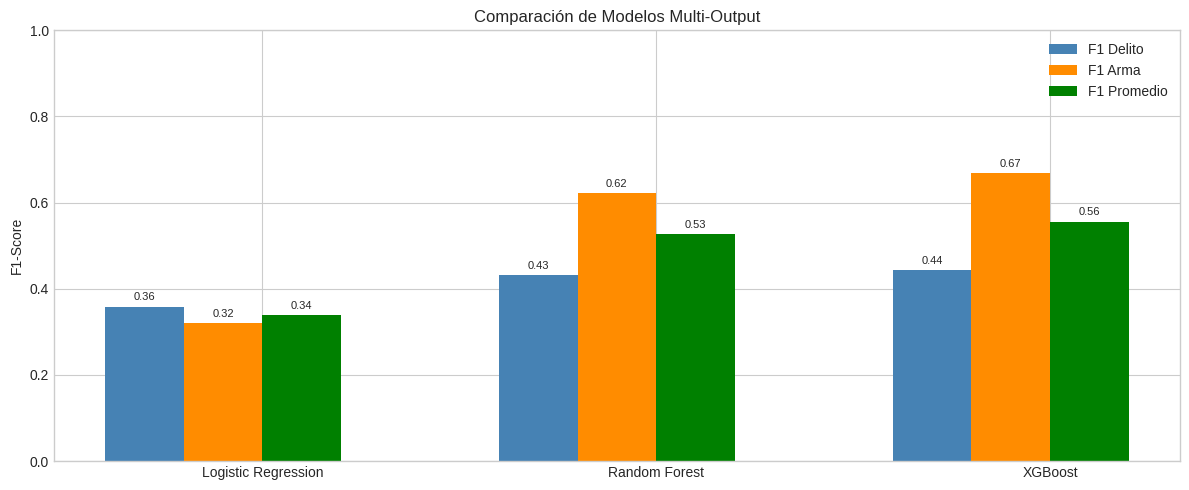

In [13]:
# 5.3 Comparación de resultados Multi-Output
print("=" * 60)
print("RESUMEN DE RESULTADOS - MODELO MULTI-OUTPUT")
print("=" * 60)

# Crear DataFrame de comparación
comparison_df = pd.DataFrame({
    'Modelo': list(results.keys()),
    'Delito_Acc': [r['accuracy_delito'] for r in results.values()],
    'Delito_F1': [r['f1_delito'] for r in results.values()],
    'Arma_Acc': [r['accuracy_arma'] for r in results.values()],
    'Arma_F1': [r['f1_arma'] for r in results.values()],
    'Promedio_F1': [r['f1_avg'] for r in results.values()]
})

print("\n📊 Comparación de modelos Multi-Output:")
print(comparison_df.to_string(index=False))

# Identificar mejor modelo (por F1 promedio)
best_model_name = max(results.items(), key=lambda x: x[1]['f1_avg'])[0]
best_result = results[best_model_name]

print(f"\n🏆 Mejor modelo Multi-Output: {best_model_name}")
print(f"   F1 Promedio: {best_result['f1_avg']:.4f}")

# Visualización
fig, ax = plt.subplots(figsize=(12, 5))

x = np.arange(len(comparison_df))
width = 0.2

bars1 = ax.bar(x - width*1.5, comparison_df['Delito_F1'], width, label='F1 Delito', color='steelblue')
bars2 = ax.bar(x - width/2, comparison_df['Arma_F1'], width, label='F1 Arma', color='darkorange')
bars3 = ax.bar(x + width/2, comparison_df['Promedio_F1'], width, label='F1 Promedio', color='green')

ax.set_ylabel('F1-Score')
ax.set_title('Comparación de Modelos Multi-Output')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Modelo'])
ax.legend()
ax.set_ylim(0, 1)

for bars in [bars1, bars2, bars3]:
    ax.bar_label(bars, fmt='%.2f', padding=3, fontsize=8)

plt.tight_layout()
plt.show()

---
## 6. Evaluación Detallada del Mejor Modelo Multi-Output

Analizamos en detalle el rendimiento del modelo para cada target.

In [14]:
# 6.1 Classification Report y Matriz de Confusión - Modelo Multi-Output
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print("=" * 60)
print("EVALUACIÓN DETALLADA - MODELO MULTI-OUTPUT")
print("=" * 60)

# Usar el mejor modelo
best_model = results[best_model_name]['model']
X_te_best = X_test_scaled if 'Logistic' in best_model_name else X_test
y_pred = best_model.predict(X_te_best)

# Separar predicciones
y_pred_delito = y_pred[:, 0]
y_pred_arma = y_pred[:, 1]

print(f"\n📊 Classification Report - DELITO DOMINANTE ({best_model_name}):\n")
print(classification_report(y_test[:, 0], y_pred_delito, target_names=le_delito.classes_))

print(f"\n📊 Classification Report - ARMA DOMINANTE ({best_model_name}):\n")
print(classification_report(y_test[:, 1], y_pred_arma, target_names=le_arma.classes_))

EVALUACIÓN DETALLADA - MODELO MULTI-OUTPUT

📊 Classification Report - DELITO DOMINANTE (XGBoost):

                         precision    recall  f1-score   support

               ABIGEATO       0.97      0.97      0.97       814
               AMENAZAS       0.30      0.31      0.31       408
       DELITOS SEXUALES       0.17      0.07      0.10       175
              EXTORSION       0.00      0.00      0.00        13
             HOMICIDIOS       0.08      0.02      0.03        53
                 HURTOS       0.27      0.02      0.03       500
               LESIONES       0.36      0.72      0.48       753
VIOLENCIA INTRAFAMILIAR       0.24      0.15      0.19       416

               accuracy                           0.49      3132
              macro avg       0.30      0.28      0.26      3132
           weighted avg       0.46      0.49      0.44      3132


📊 Classification Report - ARMA DOMINANTE (XGBoost):

                             precision    recall  f1-score   sup

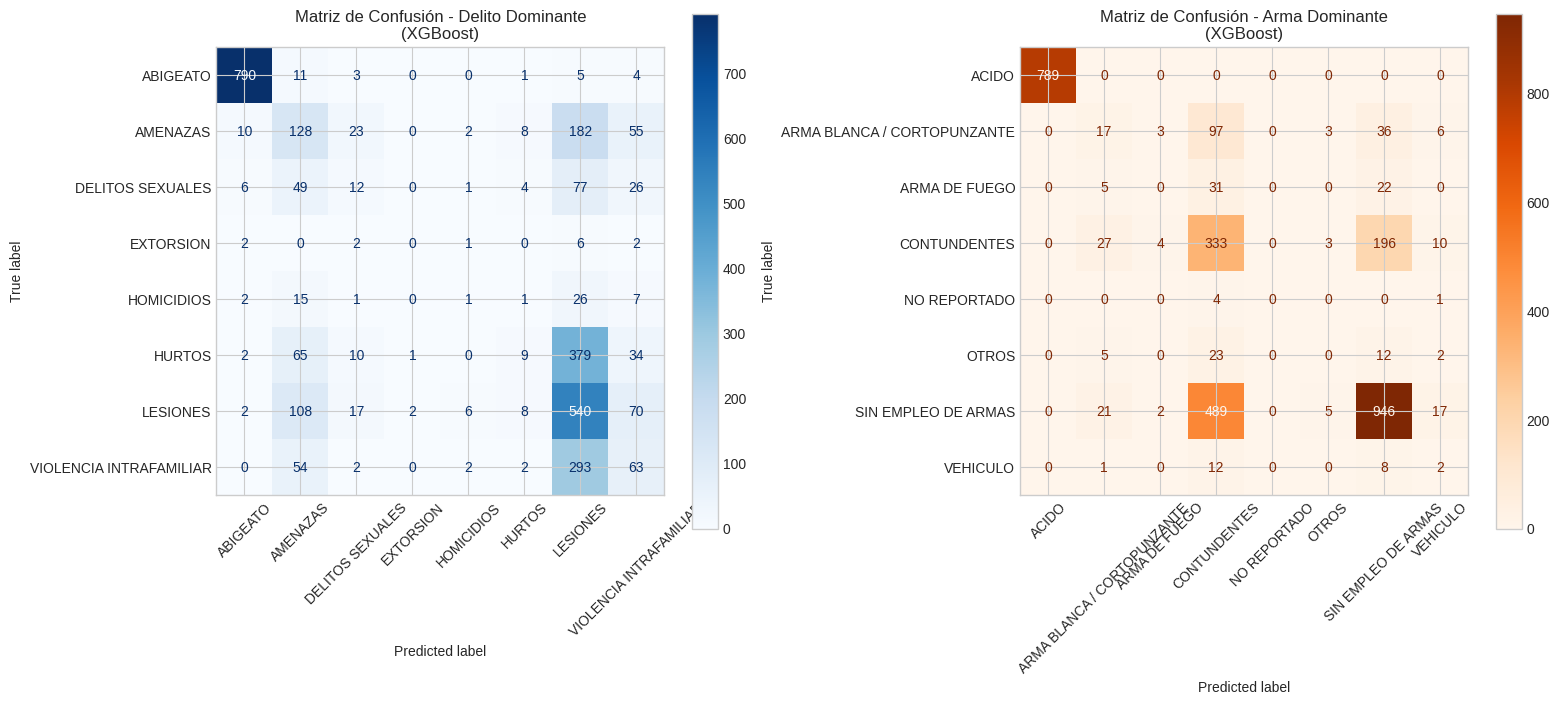

In [15]:
# 6.2 Matrices de Confusión - Modelo Multi-Output
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Delito Dominante
cm_delito = confusion_matrix(y_test[:, 0], y_pred_delito)
disp_delito = ConfusionMatrixDisplay(confusion_matrix=cm_delito, display_labels=le_delito.classes_)
disp_delito.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title(f'Matriz de Confusión - Delito Dominante\n({best_model_name})')
axes[0].tick_params(axis='x', rotation=45)

# Arma Dominante
cm_arma = confusion_matrix(y_test[:, 1], y_pred_arma)
disp_arma = ConfusionMatrixDisplay(confusion_matrix=cm_arma, display_labels=le_arma.classes_)
disp_arma.plot(ax=axes[1], cmap='Oranges', values_format='d')
axes[1].set_title(f'Matriz de Confusión - Arma Dominante\n({best_model_name})')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

IMPORTANCIA DE FEATURES - MODELO MULTI-OUTPUT


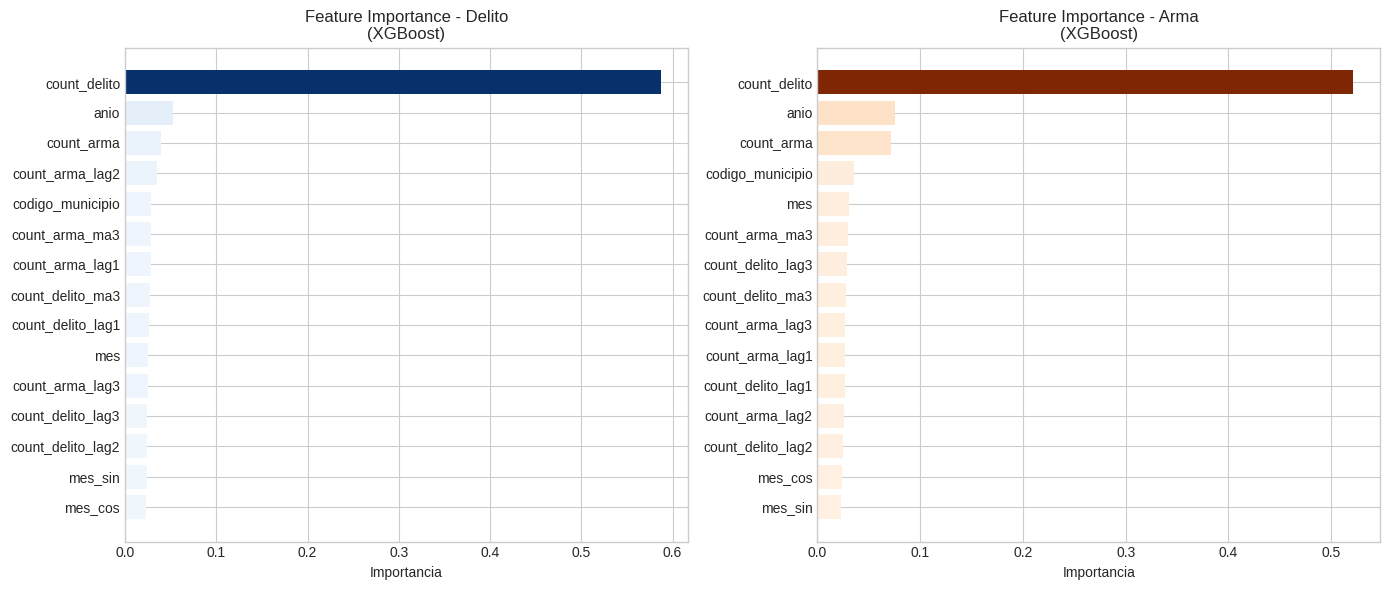


📊 Top 5 Features más importantes:

Delito Dominante:
   count_delito: 0.5870
   anio: 0.0530
   count_arma: 0.0389
   count_arma_lag2: 0.0350
   codigo_municipio: 0.0290

Arma Dominante:
   count_delito: 0.5215
   anio: 0.0758
   count_arma: 0.0716
   codigo_municipio: 0.0354
   mes: 0.0302


In [16]:
# 6.3 Importancia de Features - Modelo Multi-Output
print("=" * 60)
print("IMPORTANCIA DE FEATURES - MODELO MULTI-OUTPUT")
print("=" * 60)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# MultiOutputClassifier tiene .estimators_ con un modelo por target
if hasattr(best_model, 'estimators_'):
    # Modelo para Delito (estimator 0)
    if hasattr(best_model.estimators_[0], 'feature_importances_'):
        importance_delito = pd.DataFrame({
            'feature': feature_cols,
            'importance': best_model.estimators_[0].feature_importances_
        }).sort_values('importance', ascending=True)
        
        ax1 = axes[0]
        colors1 = plt.cm.Blues(importance_delito['importance'] / importance_delito['importance'].max())
        ax1.barh(importance_delito['feature'], importance_delito['importance'], color=colors1)
        ax1.set_xlabel('Importancia')
        ax1.set_title(f'Feature Importance - Delito\n({best_model_name})')
    
    # Modelo para Arma (estimator 1)
    if hasattr(best_model.estimators_[1], 'feature_importances_'):
        importance_arma = pd.DataFrame({
            'feature': feature_cols,
            'importance': best_model.estimators_[1].feature_importances_
        }).sort_values('importance', ascending=True)
        
        ax2 = axes[1]
        colors2 = plt.cm.Oranges(importance_arma['importance'] / importance_arma['importance'].max())
        ax2.barh(importance_arma['feature'], importance_arma['importance'], color=colors2)
        ax2.set_xlabel('Importancia')
        ax2.set_title(f'Feature Importance - Arma\n({best_model_name})')

plt.tight_layout()
plt.show()

# Top 5 features
if hasattr(best_model, 'estimators_') and hasattr(best_model.estimators_[0], 'feature_importances_'):
    print("\n📊 Top 5 Features más importantes:")
    print("\nDelito Dominante:")
    for _, row in importance_delito.tail(5).iloc[::-1].iterrows():
        print(f"   {row['feature']}: {row['importance']:.4f}")
        
    print("\nArma Dominante:")
    for _, row in importance_arma.tail(5).iloc[::-1].iterrows():
        print(f"   {row['feature']}: {row['importance']:.4f}")

---
## 7. Optimización de Hiperparámetros - Modelo Multi-Output

Optimizamos el modelo XGBoost Multi-Output para mejorar el rendimiento en ambos targets simultáneamente.

In [17]:
# 7.1 Optimización de hiperparámetros para modelo Multi-Output
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

print("=" * 60)
print("OPTIMIZACIÓN DE HIPERPARÁMETROS - MULTI-OUTPUT")
print("=" * 60)

# Espacio de búsqueda para XGBoost (parámetros del estimador base)
param_dist_xgb = {
    'estimator__n_estimators': randint(50, 300),
    'estimator__max_depth': randint(3, 15),
    'estimator__learning_rate': uniform(0.01, 0.3),
    'estimator__subsample': uniform(0.6, 0.4),
    'estimator__colsample_bytree': uniform(0.6, 0.4),
    'estimator__min_child_weight': randint(1, 10),
    'estimator__gamma': uniform(0, 0.5)
}

# Modelo Multi-Output con XGBoost
xgb_multioutput = MultiOutputClassifier(
    XGBClassifier(random_state=42, eval_metric='mlogloss', verbosity=0)
)

# Función de scoring personalizada para Multi-Output (promedio de F1)
from sklearn.metrics import make_scorer

def multioutput_f1_scorer(y_true, y_pred):
    f1_0 = f1_score(y_true[:, 0], y_pred[:, 0], average='weighted')
    f1_1 = f1_score(y_true[:, 1], y_pred[:, 1], average='weighted')
    return (f1_0 + f1_1) / 2

scorer = make_scorer(multioutput_f1_scorer)

random_search = RandomizedSearchCV(
    xgb_multioutput, 
    param_distributions=param_dist_xgb,
    n_iter=30,
    cv=3,
    scoring=scorer,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

print("\n🔍 Buscando mejores hiperparámetros...")
random_search.fit(X_train, y_train)

print(f"\n✅ Mejores hiperparámetros encontrados:")
for param, value in random_search.best_params_.items():
    print(f"   {param.replace('estimator__', '')}: {value}")

print(f"\n📊 Mejor F1-Score promedio (CV): {random_search.best_score_:.4f}")

OPTIMIZACIÓN DE HIPERPARÁMETROS - MULTI-OUTPUT

🔍 Buscando mejores hiperparámetros...
Fitting 3 folds for each of 30 candidates, totalling 90 fits

✅ Mejores hiperparámetros encontrados:
   colsample_bytree: 0.9100531293444458
   gamma: 0.46974947078209456
   learning_rate: 0.27844820512829466
   max_depth: 10
   min_child_weight: 7
   n_estimators: 298
   subsample: 0.9844688097397396

📊 Mejor F1-Score promedio (CV): 0.5779


---
## 8. Evaluación del Modelo Multi-Output Optimizado

COMPARACIÓN: MODELO BASE vs OPTIMIZADO

📊 DELITO DOMINANTE:
   Base      - Accuracy: 0.4927 | F1: 0.4430
   Optimizado - Accuracy: 0.4984 | F1: 0.4381
   Mejora F1: -0.49%

📊 ARMA DOMINANTE:
   Base      - Accuracy: 0.6663 | F1: 0.6689
   Optimizado - Accuracy: 0.6922 | F1: 0.6893
   Mejora F1: +2.03%

📊 PROMEDIO:
   Base      - F1: 0.5559
   Optimizado - F1: 0.5637
   Mejora F1: +0.77%


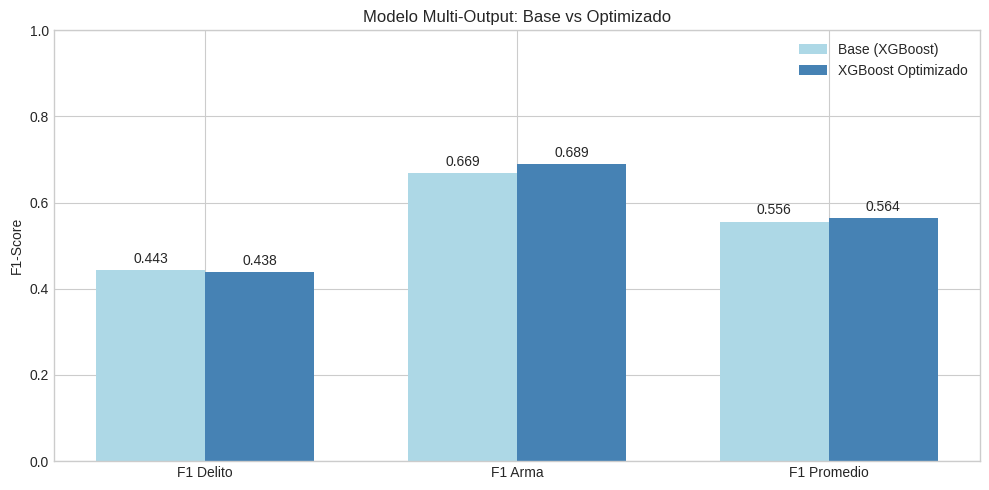

In [18]:
# 8.1 Evaluación del modelo optimizado vs base
print("=" * 60)
print("COMPARACIÓN: MODELO BASE vs OPTIMIZADO")
print("=" * 60)

# Predicciones con modelo optimizado
y_pred_opt = random_search.best_estimator_.predict(X_test)
y_pred_delito_opt = y_pred_opt[:, 0]
y_pred_arma_opt = y_pred_opt[:, 1]

# Métricas optimizadas
acc_delito_opt = accuracy_score(y_test[:, 0], y_pred_delito_opt)
f1_delito_opt = f1_score(y_test[:, 0], y_pred_delito_opt, average='weighted')
acc_arma_opt = accuracy_score(y_test[:, 1], y_pred_arma_opt)
f1_arma_opt = f1_score(y_test[:, 1], y_pred_arma_opt, average='weighted')
f1_avg_opt = (f1_delito_opt + f1_arma_opt) / 2

# Comparación
print("\n📊 DELITO DOMINANTE:")
print(f"   Base      - Accuracy: {best_result['accuracy_delito']:.4f} | F1: {best_result['f1_delito']:.4f}")
print(f"   Optimizado - Accuracy: {acc_delito_opt:.4f} | F1: {f1_delito_opt:.4f}")
print(f"   Mejora F1: {(f1_delito_opt - best_result['f1_delito'])*100:+.2f}%")

print("\n📊 ARMA DOMINANTE:")
print(f"   Base      - Accuracy: {best_result['accuracy_arma']:.4f} | F1: {best_result['f1_arma']:.4f}")
print(f"   Optimizado - Accuracy: {acc_arma_opt:.4f} | F1: {f1_arma_opt:.4f}")
print(f"   Mejora F1: {(f1_arma_opt - best_result['f1_arma'])*100:+.2f}%")

print("\n📊 PROMEDIO:")
print(f"   Base      - F1: {best_result['f1_avg']:.4f}")
print(f"   Optimizado - F1: {f1_avg_opt:.4f}")
print(f"   Mejora F1: {(f1_avg_opt - best_result['f1_avg'])*100:+.2f}%")

# Visualización comparativa
fig, ax = plt.subplots(figsize=(10, 5))

metrics = ['F1 Delito', 'F1 Arma', 'F1 Promedio']
base_vals = [best_result['f1_delito'], best_result['f1_arma'], best_result['f1_avg']]
opt_vals = [f1_delito_opt, f1_arma_opt, f1_avg_opt]

x = np.arange(len(metrics))
width = 0.35

bars1 = ax.bar(x - width/2, base_vals, width, label=f'Base ({best_model_name})', color='lightblue')
bars2 = ax.bar(x + width/2, opt_vals, width, label='XGBoost Optimizado', color='steelblue')
ax.set_ylabel('F1-Score')
ax.set_title('Modelo Multi-Output: Base vs Optimizado')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim(0, 1)
ax.bar_label(bars1, fmt='%.3f', padding=3)
ax.bar_label(bars2, fmt='%.3f', padding=3)

plt.tight_layout()
plt.show()

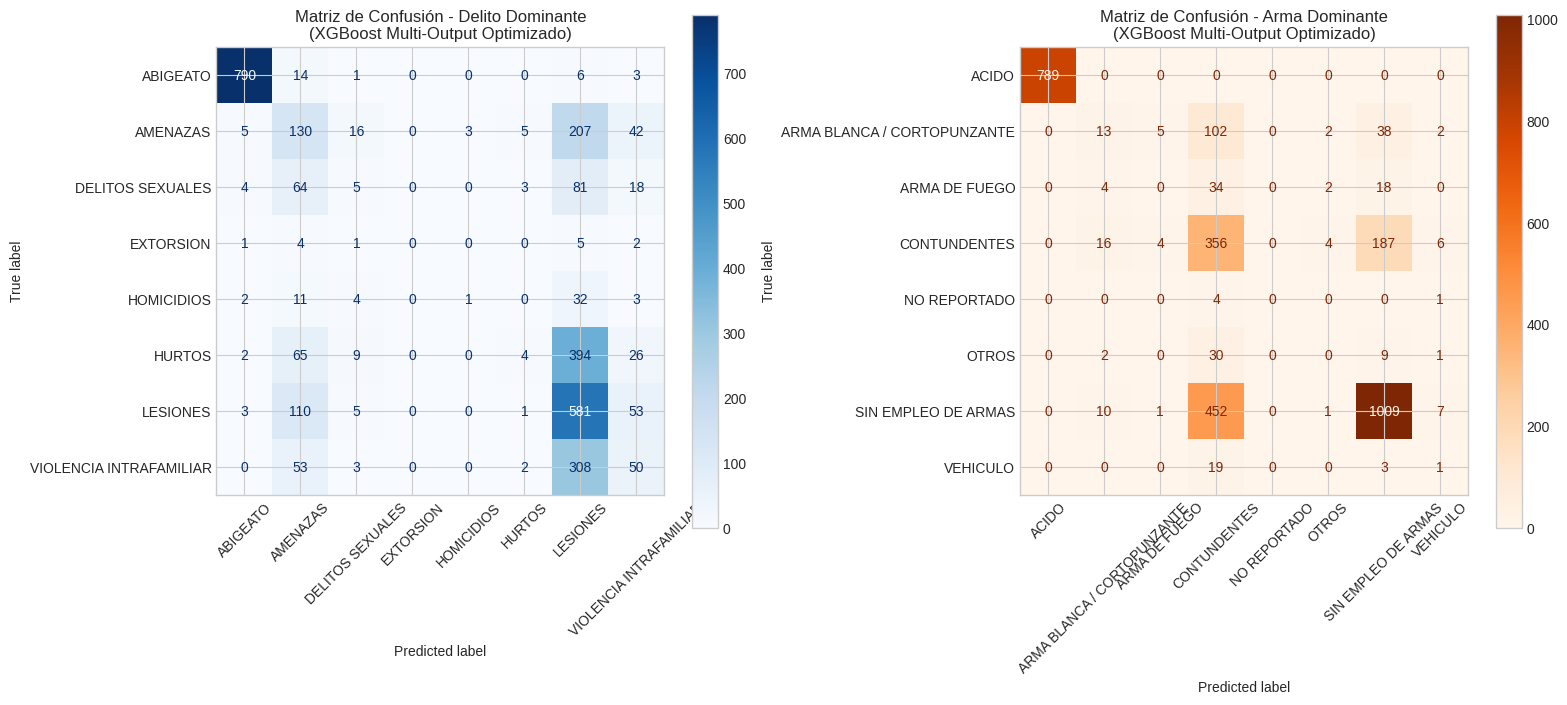

CLASSIFICATION REPORT - DELITO DOMINANTE (OPTIMIZADO)
                         precision    recall  f1-score   support

               ABIGEATO       0.98      0.97      0.97       814
               AMENAZAS       0.29      0.32      0.30       408
       DELITOS SEXUALES       0.11      0.03      0.05       175
              EXTORSION       0.00      0.00      0.00        13
             HOMICIDIOS       0.25      0.02      0.04        53
                 HURTOS       0.27      0.01      0.02       500
               LESIONES       0.36      0.77      0.49       753
VIOLENCIA INTRAFAMILIAR       0.25      0.12      0.16       416

               accuracy                           0.50      3132
              macro avg       0.31      0.28      0.25      3132
           weighted avg       0.47      0.50      0.44      3132


CLASSIFICATION REPORT - ARMA DOMINANTE (OPTIMIZADO)
                             precision    recall  f1-score   support

                      ACIDO       1.00  

In [19]:
# 8.2 Matrices de Confusión - Modelo Optimizado
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Delito Dominante
cm_delito_opt = confusion_matrix(y_test[:, 0], y_pred_delito_opt)
disp_delito = ConfusionMatrixDisplay(confusion_matrix=cm_delito_opt, display_labels=le_delito.classes_)
disp_delito.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title('Matriz de Confusión - Delito Dominante\n(XGBoost Multi-Output Optimizado)')
axes[0].tick_params(axis='x', rotation=45)

# Arma Dominante
cm_arma_opt = confusion_matrix(y_test[:, 1], y_pred_arma_opt)
disp_arma = ConfusionMatrixDisplay(confusion_matrix=cm_arma_opt, display_labels=le_arma.classes_)
disp_arma.plot(ax=axes[1], cmap='Oranges', values_format='d')
axes[1].set_title('Matriz de Confusión - Arma Dominante\n(XGBoost Multi-Output Optimizado)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Classification Reports
print("=" * 60)
print("CLASSIFICATION REPORT - DELITO DOMINANTE (OPTIMIZADO)")
print("=" * 60)
print(classification_report(y_test[:, 0], y_pred_delito_opt, target_names=le_delito.classes_))

print("\n" + "=" * 60)
print("CLASSIFICATION REPORT - ARMA DOMINANTE (OPTIMIZADO)")
print("=" * 60)
print(classification_report(y_test[:, 1], y_pred_arma_opt, target_names=le_arma.classes_))

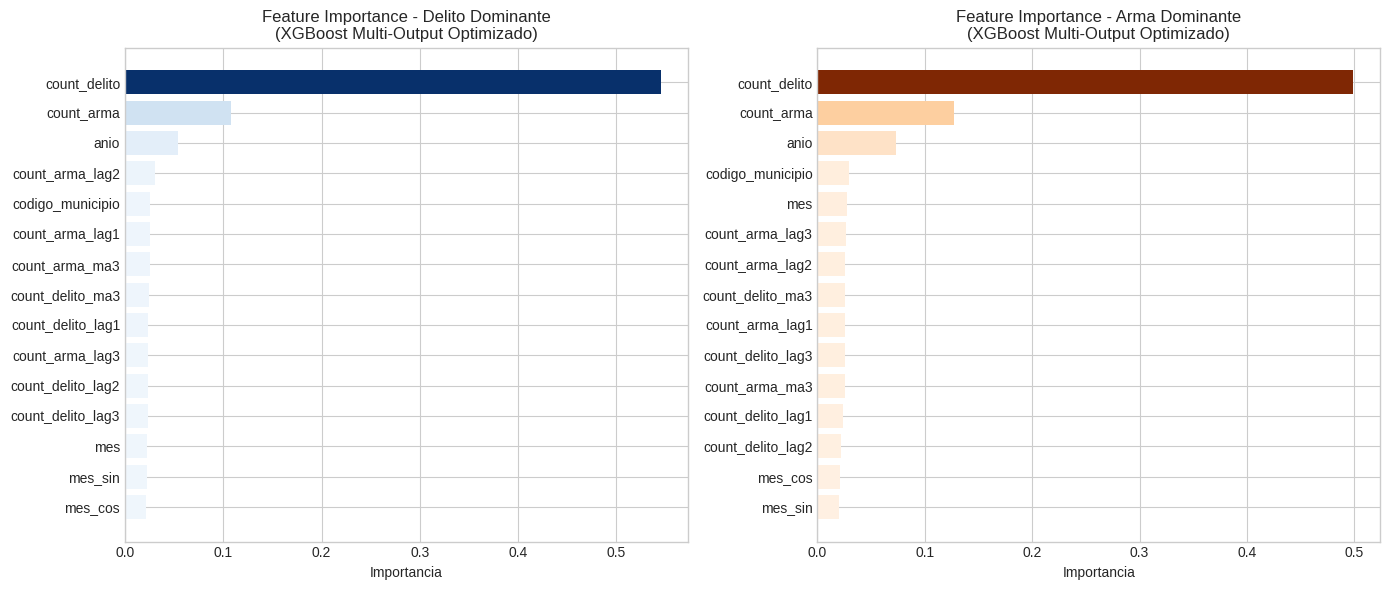


📊 Top 5 Features más importantes:

Delito Dominante:
   count_delito: 0.5451
   count_arma: 0.1081
   anio: 0.0540
   count_arma_lag2: 0.0305
   codigo_municipio: 0.0259

Arma Dominante:
   count_delito: 0.4990
   count_arma: 0.1274
   anio: 0.0736
   codigo_municipio: 0.0298
   mes: 0.0275


In [20]:
# 8.3 Importancia de Features - Modelo Optimizado
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# El modelo optimizado también tiene estimators_
best_estimator = random_search.best_estimator_

# Delito Dominante (estimator 0)
importance_delito_opt = pd.DataFrame({
    'feature': feature_cols,
    'importance': best_estimator.estimators_[0].feature_importances_
}).sort_values('importance', ascending=True)

ax1 = axes[0]
colors1 = plt.cm.Blues(importance_delito_opt['importance'] / importance_delito_opt['importance'].max())
ax1.barh(importance_delito_opt['feature'], importance_delito_opt['importance'], color=colors1)
ax1.set_xlabel('Importancia')
ax1.set_title('Feature Importance - Delito Dominante\n(XGBoost Multi-Output Optimizado)')

# Arma Dominante (estimator 1)
importance_arma_opt = pd.DataFrame({
    'feature': feature_cols,
    'importance': best_estimator.estimators_[1].feature_importances_
}).sort_values('importance', ascending=True)

ax2 = axes[1]
colors2 = plt.cm.Oranges(importance_arma_opt['importance'] / importance_arma_opt['importance'].max())
ax2.barh(importance_arma_opt['feature'], importance_arma_opt['importance'], color=colors2)
ax2.set_xlabel('Importancia')
ax2.set_title('Feature Importance - Arma Dominante\n(XGBoost Multi-Output Optimizado)')

plt.tight_layout()
plt.show()

print("\n📊 Top 5 Features más importantes:")
print("\nDelito Dominante:")
for _, row in importance_delito_opt.tail(5).iloc[::-1].iterrows():
    print(f"   {row['feature']}: {row['importance']:.4f}")
    
print("\nArma Dominante:")
for _, row in importance_arma_opt.tail(5).iloc[::-1].iterrows():
    print(f"   {row['feature']}: {row['importance']:.4f}")

---
## 9. Guardado de Modelos y Conclusiones

In [21]:
# 9.1 Guardar modelo Multi-Output
import joblib
import json

# Crear directorio específico para este modelo
MODEL_NAME = 'classification_dominant'
MODELS_DIR = BASE_DIR / 'models' / 'predictivos' / MODEL_NAME
MODELS_DIR.mkdir(parents=True, exist_ok=True)

# Guardar modelo Multi-Output optimizado (UN SOLO ARCHIVO)
joblib.dump(random_search.best_estimator_, MODELS_DIR / 'xgb_multioutput.joblib')

# Guardar encoders
joblib.dump(le_delito, MODELS_DIR / 'label_encoder_delito.joblib')
joblib.dump(le_arma, MODELS_DIR / 'label_encoder_arma.joblib')

# Guardar scaler
joblib.dump(scaler, MODELS_DIR / 'scaler.joblib')

# Guardar metadata del modelo
metadata = {
    'model_name': MODEL_NAME,
    'model_type': 'MultiOutputClassifier',
    'base_estimator': 'XGBClassifier',
    'created_at': pd.Timestamp.now().isoformat(),
    'features': feature_cols,
    'targets': ['delito_dominante', 'arma_dominante'],
    'target_classes': {
        'delito_dominante': le_delito.classes_.tolist(),
        'arma_dominante': le_arma.classes_.tolist()
    },
    'best_params': {k.replace('estimator__', ''): v for k, v in random_search.best_params_.items()},
    'metrics': {
        'delito_dominante': {'accuracy': float(acc_delito_opt), 'f1_weighted': float(f1_delito_opt)},
        'arma_dominante': {'accuracy': float(acc_arma_opt), 'f1_weighted': float(f1_arma_opt)},
        'promedio': {'f1_weighted': float(f1_avg_opt)}
    },
    'train_samples': len(X_train),
    'test_samples': len(X_test),
    'year_split': YEAR_SPLIT
}

with open(MODELS_DIR / 'metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2, default=str)

print(f"✅ Modelo Multi-Output guardado en: {MODELS_DIR}")
print(f"\n📁 Archivos guardados:")
for file in sorted(MODELS_DIR.iterdir()):
    print(f"   - {file.name}")

print(f"\n🎯 El modelo predice simultáneamente:")
print(f"   1. delito_dominante: {le_delito.classes_.tolist()}")
print(f"   2. arma_dominante: {le_arma.classes_.tolist()}")

✅ Modelo Multi-Output guardado en: /home/byverbel/challenges/Datos-al-Ecosistema/models/predictivos/classification_dominant

📁 Archivos guardados:
   - label_encoder_arma.joblib
   - label_encoder_delito.joblib
   - metadata.json
   - scaler.joblib
   - xgb_multioutput.joblib

🎯 El modelo predice simultáneamente:
   1. delito_dominante: ['ABIGEATO', 'AMENAZAS', 'DELITOS SEXUALES', 'EXTORSION', 'HOMICIDIOS', 'HURTOS', 'LESIONES', 'VIOLENCIA INTRAFAMILIAR']
   2. arma_dominante: ['ACIDO', 'ARMA BLANCA / CORTOPUNZANTE', 'ARMA DE FUEGO', 'CONTUNDENTES', 'NO REPORTADO', 'OTROS', 'SIN EMPLEO DE ARMAS', 'VEHICULO']


---
## 10. Ejemplo de Uso del Modelo

Demostración de cómo usar el modelo guardado para hacer predicciones.

In [22]:
# 10.1 Ejemplo de uso del modelo Multi-Output
print("=" * 60)
print("EJEMPLO DE USO DEL MODELO")
print("=" * 60)

# Simular carga del modelo (en producción)
modelo_cargado = joblib.load(MODELS_DIR / 'xgb_multioutput.joblib')
le_delito_cargado = joblib.load(MODELS_DIR / 'label_encoder_delito.joblib')
le_arma_cargado = joblib.load(MODELS_DIR / 'label_encoder_arma.joblib')

# Tomar un ejemplo del test set
ejemplo_idx = 0
ejemplo_X = X_test.iloc[[ejemplo_idx]]
ejemplo_y_real = y_test[ejemplo_idx]

print(f"\n📥 ENTRADA (Features del municipio-mes):")
for col in feature_cols:
    print(f"   {col}: {ejemplo_X[col].values[0]:.2f}")

# Predicción
prediccion = modelo_cargado.predict(ejemplo_X)
pred_delito = le_delito_cargado.inverse_transform([prediccion[0, 0]])[0]
pred_arma = le_arma_cargado.inverse_transform([prediccion[0, 1]])[0]

# Valores reales
real_delito = le_delito_cargado.inverse_transform([ejemplo_y_real[0]])[0]
real_arma = le_arma_cargado.inverse_transform([ejemplo_y_real[1]])[0]

print(f"\n📤 SALIDA (Predicción del modelo):")
print(f"   🔴 Delito dominante predicho: {pred_delito}")
print(f"   🔧 Arma dominante predicha:   {pred_arma}")

print(f"\n✅ VALORES REALES:")
print(f"   🔴 Delito dominante real: {real_delito}")
print(f"   🔧 Arma dominante real:   {real_arma}")

# Verificar si acertó
acierto_delito = "✓" if pred_delito == real_delito else "✗"
acierto_arma = "✓" if pred_arma == real_arma else "✗"
print(f"\n📊 Resultado: Delito {acierto_delito} | Arma {acierto_arma}")

EJEMPLO DE USO DEL MODELO

📥 ENTRADA (Features del municipio-mes):
   anio: 2023.00
   mes: 1.00
   codigo_municipio: 68001.00
   count_delito: 226.00
   count_arma: 170.00
   mes_sin: 0.50
   mes_cos: 0.87
   count_delito_lag1: 106.00
   count_delito_lag2: 132.00
   count_delito_lag3: 152.00
   count_arma_lag1: 78.00
   count_arma_lag2: 103.00
   count_arma_lag3: 112.00
   count_delito_ma3: 130.00
   count_arma_ma3: 97.67

📤 SALIDA (Predicción del modelo):
   🔴 Delito dominante predicho: LESIONES
   🔧 Arma dominante predicha:   SIN EMPLEO DE ARMAS

✅ VALORES REALES:
   🔴 Delito dominante real: HURTOS
   🔧 Arma dominante real:   SIN EMPLEO DE ARMAS

📊 Resultado: Delito ✗ | Arma ✓


---
## 11. Conclusiones y Recomendaciones

### Resumen del Modelo Multi-Output

| Métrica | Delito Dominante | Arma Dominante | Promedio |
|---------|------------------|----------------|----------|
| Accuracy | Ver arriba | Ver arriba | - |
| F1-Score | Ver arriba | Ver arriba | Ver arriba |

### Ventajas del Enfoque Multi-Output

1. **Un solo modelo** para ambas predicciones
2. **Consistencia** entre predicciones de delito y arma
3. **Captura correlaciones** entre ambos targets
4. **Facilidad de despliegue** - un solo archivo

### Hallazgos Clave

1. **Features más Importantes**:
   - Las variables de conteo (`count_delito`, `count_arma`) son los predictores más fuertes
   - Los lag features capturan patrones temporales importantes
   - El código de municipio aporta contexto geográfico

2. **Desbalance de Clases**:
   - Armas minoritarias fueron agrupadas en "OTROS"
   - El modelo usa class_weight para manejar desbalance

### Utilidad Práctica

```python
# Ejemplo de uso en producción:
import joblib

modelo = joblib.load('models/classification_dominant/xgb_multioutput.joblib')
prediccion = modelo.predict(datos_nuevos)
# prediccion = [[delito_idx, arma_idx]]
```

### Archivos del Modelo

```
models/classification_dominant/
├── xgb_multioutput.joblib      # Modelo único Multi-Output
├── label_encoder_delito.joblib # Decodificar predicción delito
├── label_encoder_arma.joblib   # Decodificar predicción arma
├── scaler.joblib               # Escalar features (si se usa)
└── metadata.json               # Info del modelo
```

### Próximos Pasos

1. Monitorear rendimiento en producción
2. Re-entrenar periódicamente con datos nuevos
3. Explorar técnicas de oversampling (SMOTE)
4. Considerar ensemble de modelos para mayor robustez